In [ ]:
pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 42.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


In [ ]:
!pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 KB 14.5 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,confusion_matrix,classification_report,roc_auc_score
from lightgbm import LGBMClassifier

In [ ]:
df_train=pd.read_csv('train.csv')


OE = ['Vehicle_Damage', 'Vehicle_Age', 'Gender']
dic = {'Female':0, 'Male': 1, 'Yes': 1, 'No': 0, '< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2}
df_train[OE] = df_train[OE].replace(dic, inplace = False)


df_train['Policy_Sales_Channel']=pd.cut(df_train['Policy_Sales_Channel'],bins=[df_train['Policy_Sales_Channel'].min()-1,75,126,df_train['Policy_Sales_Channel'].max()+1],labels=[0,1,2])

df_train=df_train.astype('int')


df_y_train=df_train['Response']
df_train=df_train.drop('Response',axis=1)


x_train, x_test, y_train, y_test = train_test_split(df_train, df_y_train, test_size = 0.25, random_state = 22, stratify = df_y_train, shuffle = True)

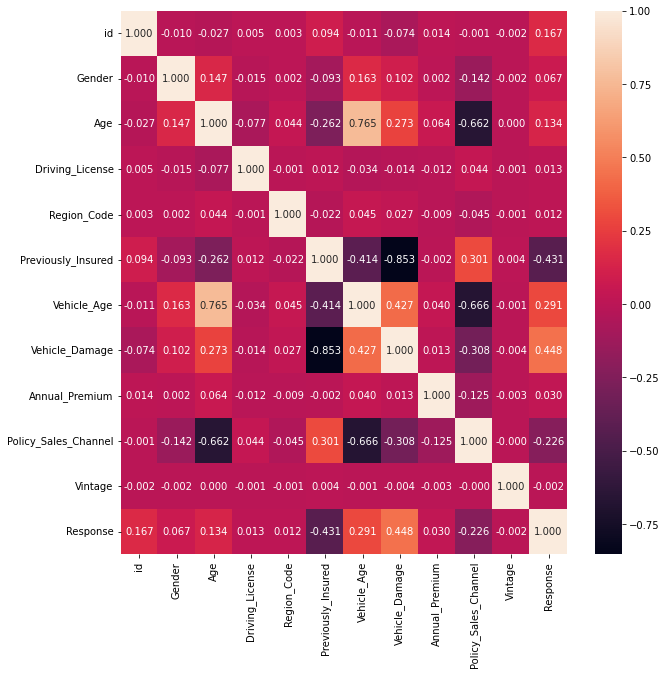

In [ ]:
plt.figure(figsize = (10,10))
corr=df_train.corr()
sns.heatmap(corr, annot=True, fmt=".3f")

In [ ]:
df_train

In [ ]:
plt.figure(figsize = (8,5))
sns.distplot(df_train[df_train.Response==0]['Age'], label='0')
sns.distplot(df_train[df_train.Response==1]['Age'], label='1')
plt.legend()
plt.show()
plt.figure(figsize = (8,5))
sns.distplot(df_train[df_train.Response==0]['Policy_Sales_Channel'], label='0')
sns.distplot(df_train[df_train.Response==1]['Policy_Sales_Channel'], label='1')
plt.legend()
plt.show()

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import ADASYN

ros = RandomOverSampler(random_state=42, sampling_strategy='minority')
x_train, y_train = ros.fit_resample(x_train, y_train)

ada = ADASYN(random_state=42)
x_train, y_train = ada.fit_resample(x_train, y_train)

In [ ]:
x_train['ss']=y_train

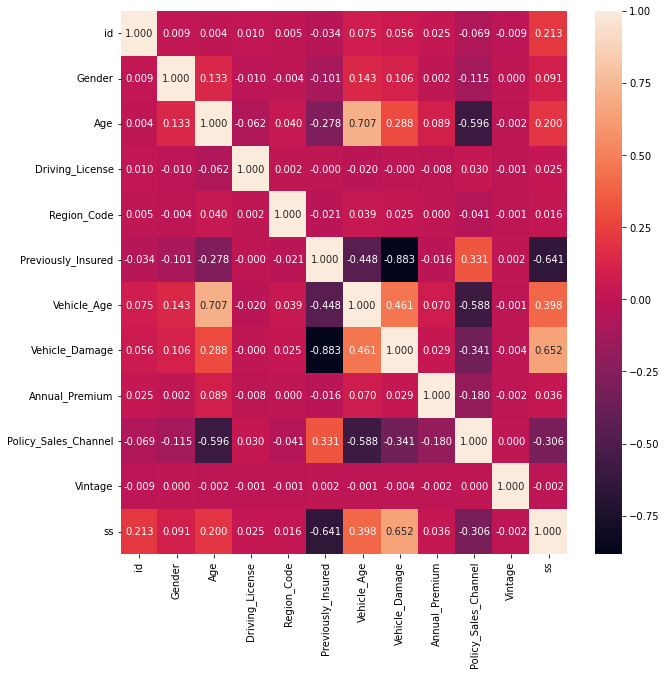

In [ ]:
plt.figure(figsize = (10,10))
corr=x_train.corr()
sns.heatmap(corr, annot=True, fmt=".3f")

In [ ]:
# from imblearn.ensemble import BalancedBaggingClassifier
# Bagging = BalancedBaggingClassifier(base_estimator=LGBMClassifier(),sampling_strategy='not majority',replacement=False,random_state=0)

# Bagging.fit(x_train, y_train)

In [ ]:
# threshold = 0.48
# predicted_proba = classifier.predict_proba(x_test)
# pred = (predicted_proba [:,1] >= threshold).astype('int')

In [ ]:
pred=Bagging.predict(x_test)

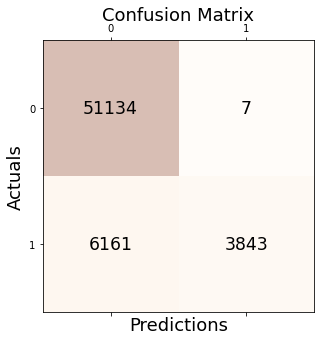

0.38414634146341464
0.9981818181818182
0.5547856214811606
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     51141
           1       1.00      0.38      0.55     10004

    accuracy                           0.90     61145
   macro avg       0.95      0.69      0.75     61145
weighted avg       0.91      0.90      0.88     61145



In [ ]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
print(recall_score(y_test, pred))
print(precision_score(y_test, pred))
print(f1_score(y_test, pred))
score=classification_report(y_test, pred)
print(score)

In [ ]:
df_test=pd.read_csv('test.csv')


OE = ['Vehicle_Damage', 'Vehicle_Age', 'Gender']
dic = {'Female':0, 'Male': 1, 'Yes': 1, 'No': 0, '< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2}
df_test[OE] = df_test[OE].replace(dic, inplace = False)


df_test['Policy_Sales_Channel']=pd.cut(df_test['Policy_Sales_Channel'],bins=[df_test['Policy_Sales_Channel'].min()-1,75,126,df_test['Policy_Sales_Channel'].max()+1],labels=[0,1,2])


df_test=df_test.astype('int')


Id=df_test['id']

In [ ]:
threshold = 0.5

predicted_proba = Bagging.predict_proba(df_test)
pred = (predicted_proba [:,1] >= threshold).astype('int')

In [ ]:
final_pred = pd.DataFrame()
final_pred["id"] = Id
pred= pd.Series(pred)
final_pred["Response"] = pred

In [ ]:
final_pred['Response'].value_counts()

In [ ]:
final_pred.to_csv('pred.csv', index=False)